<a href="https://colab.research.google.com/github/guindo/fastaiproject/blob/main/typemonkey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 6.7MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 1.2MB 56.1MB/s 
     |████████████████████████████████| 194kB 54.5MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 12.8MB 245kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
import fastbook
fastbook.setup_book()

In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
pip install jmd_imagescraper


In [ ]:
from pathlib import Path

root = Path().cwd()/"/content/gdrive/MyDrive/fastai/unpackai/datafast"


In [ ]:
from jmd_imagescraper.core import *
duckduckgo_search(root, "orangutan" ,"orangutan", max_results=300)

In [ ]:
from jmd_imagescraper.imagecleaner import *

display_image_cleaner(root)

In [ ]:
from fastai.vision.all import *
from fastai.imports import *
root_dir = "/content/gdrive/My Drive/fastai/unpackai"
destination = Path(root_dir + '/datafast')
path = destination

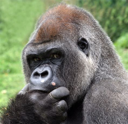

In [ ]:
# make a list of all images of monkey
list_gorilla = [f for f in (path / 'gorilla').iterdir() if f.is_file()]
list_gorilla
# pick one and show it
picked_image = 3

im = Image.open(list_gorilla[picked_image])
im.to_thumb(128,128)

In [ ]:
fns = get_image_files(path)
fns

(#2680) [Path('/content/gdrive/My Drive/fastai/unpackai/datafast/Sloth/001_99ab9693.jpg'),Path('/content/gdrive/My Drive/fastai/unpackai/datafast/Sloth/002_222bffde.jpg'),Path('/content/gdrive/My Drive/fastai/unpackai/datafast/Sloth/003_7df90586.jpg'),Path('/content/gdrive/My Drive/fastai/unpackai/datafast/Sloth/004_e34170ab.jpg'),Path('/content/gdrive/My Drive/fastai/unpackai/datafast/Sloth/005_ef7f69a3.jpg'),Path('/content/gdrive/My Drive/fastai/unpackai/datafast/Sloth/006_532f5704.jpg'),Path('/content/gdrive/My Drive/fastai/unpackai/datafast/Sloth/007_e9cde40d.jpg'),Path('/content/gdrive/My Drive/fastai/unpackai/datafast/Sloth/008_54466e9d.jpg'),Path('/content/gdrive/My Drive/fastai/unpackai/datafast/Sloth/009_9a4a6ab8.jpg'),Path('/content/gdrive/My Drive/fastai/unpackai/datafast/Sloth/010_e2eb198a.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
#create datablock
datafast = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.4, seed=2),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = datafast.dataloaders(path)

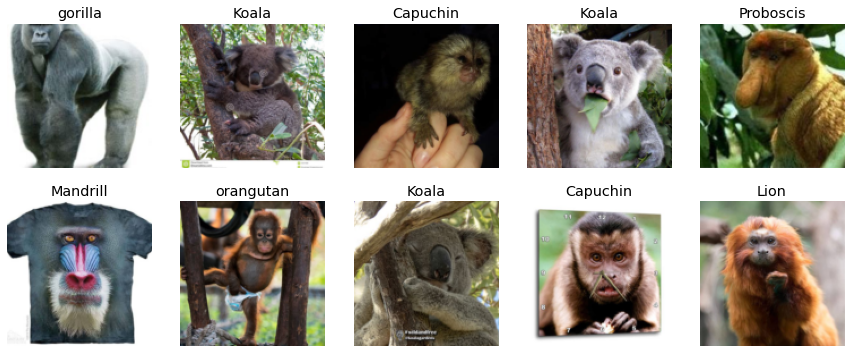

In [ ]:
dls.valid.show_batch(max_n=10, nrows=2)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=[error_rate,accuracy])
learn.fine_tune(15)

<Figure size 432x288 with 0 Axes>

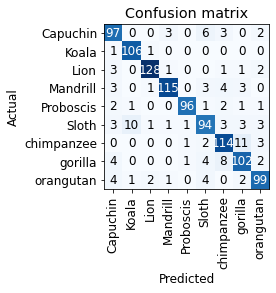

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
plt.savefig('confusion1.png')
interp.plot_confusion_matrix()


In [ ]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate,accuracy])
learn.fine_tune(15)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


<Figure size 432x288 with 0 Axes>

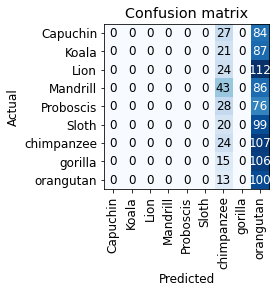

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
plt.savefig('confusion2.png')
interp.plot_confusion_matrix()


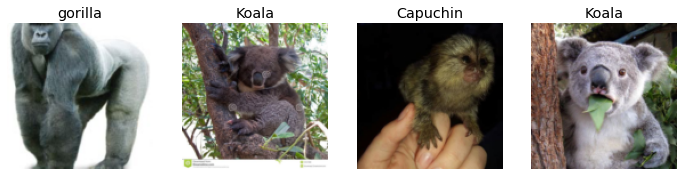

In [ ]:
datafast = datafast.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = datafast.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=[error_rate,accuracy])
learn.fine_tune(15)

<Figure size 432x288 with 0 Axes>

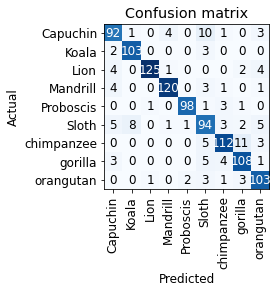

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
plt.savefig('confusion3.png')
interp.plot_confusion_matrix()


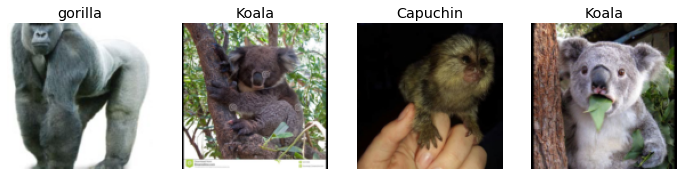

In [ ]:
datafast = datafast.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = datafast.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=[error_rate,accuracy])
learn.fine_tune(15)

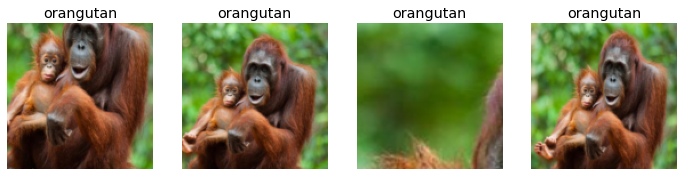

In [ ]:
datafast = datafast.new(item_tfms=RandomResizedCrop(128, min_scale=0.))
dls = datafast.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=[error_rate,accuracy])
learn.fine_tune(15)

<Figure size 432x288 with 0 Axes>

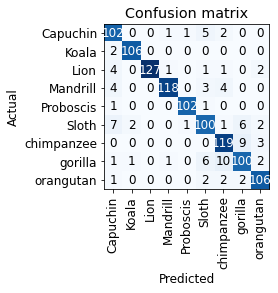

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
plt.savefig('confusion4.png')
interp.plot_confusion_matrix()


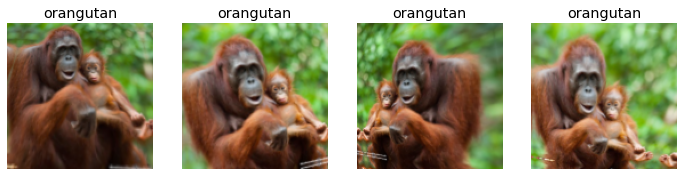

In [ ]:
datafast = datafast.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = datafast.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=[error_rate,accuracy])
learn.fine_tune(15)

<Figure size 432x288 with 0 Axes>

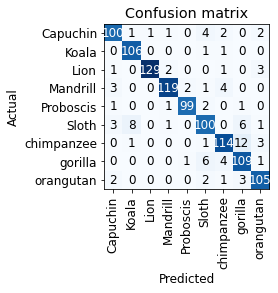

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
plt.savefig('confusion4.png')
interp.plot_confusion_matrix()


In [ ]:
datafast = datafast.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.),
    batch_tfms=aug_transforms(mult=2))
dls = datafast.dataloaders(path,num_workers=0)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=[error_rate,accuracy])
learn.fine_tune(15)

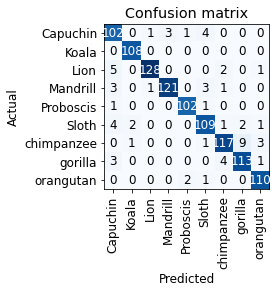

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

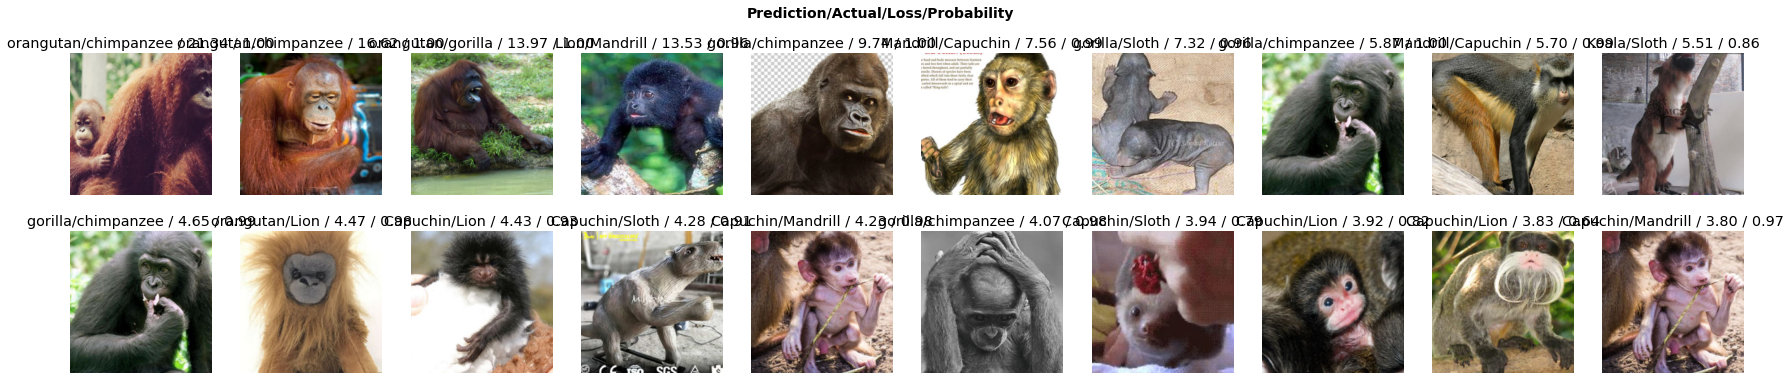

In [ ]:
interp.plot_top_losses(20, nrows=2)

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
#create datablock
datafast = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.4, seed=2),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
datafast = datafast.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.),
    batch_tfms=aug_transforms(mult=2))
dls = datafast.dataloaders(path,num_workers=0)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=[error_rate,accuracy])
learn.fine_tune(15)

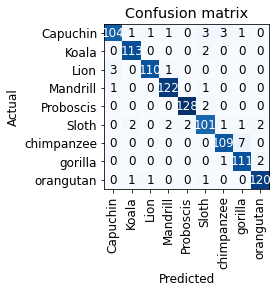

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

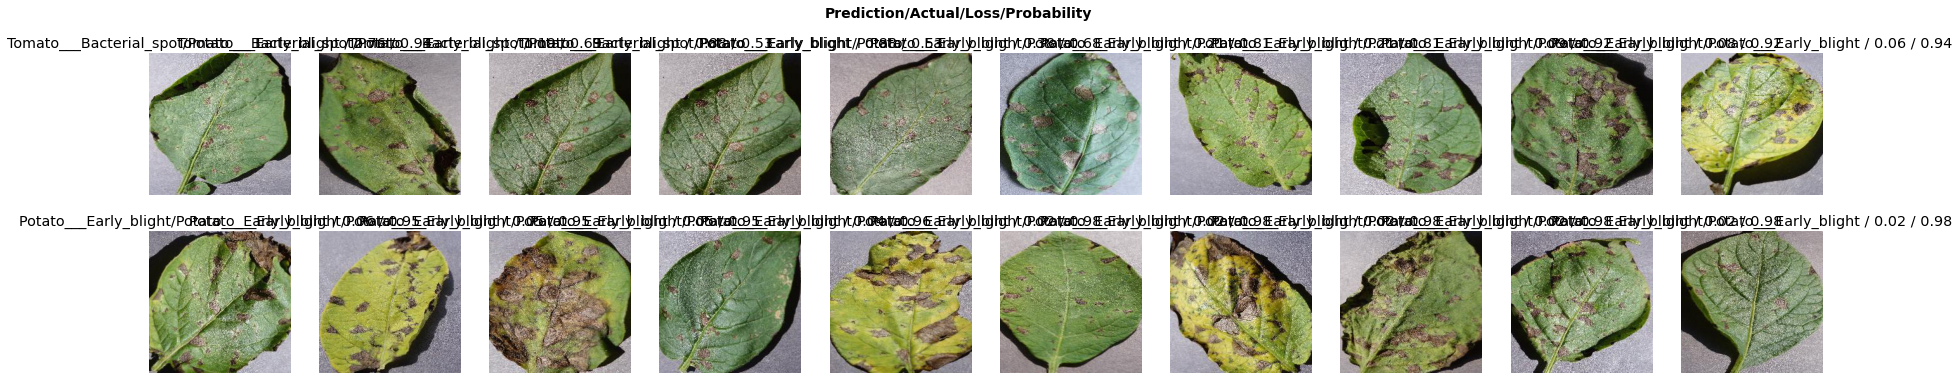

In [ ]:
interp.plot_top_losses(20, nrows=2)

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
#create datablock
datafast = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.4, seed=2),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
datafast = datafast.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.),
    batch_tfms=aug_transforms(mult=2))
dls = datafast.dataloaders(path,num_workers=0)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=[error_rate,accuracy])
learn.fine_tune(15)

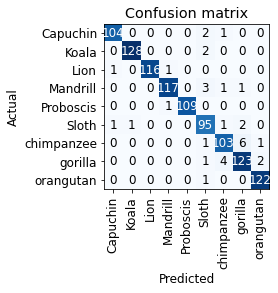

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=[error_rate,accuracy])


SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.002511886414140463)

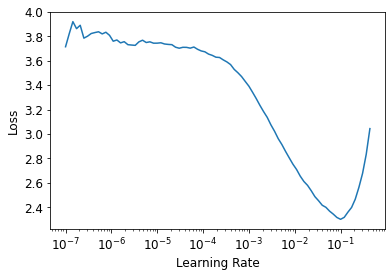

In [ ]:
learn.lr_find()


In [ ]:
learn.fine_tune(20,0.010)

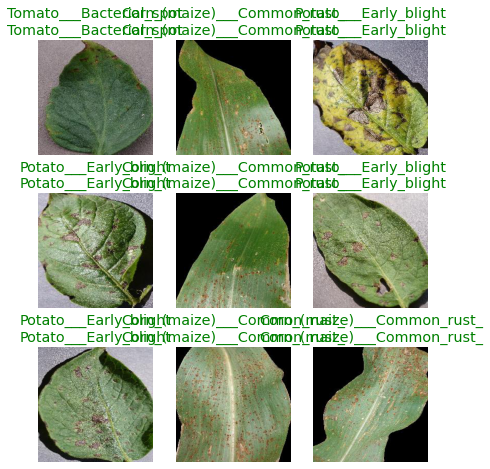

In [ ]:
learn.show_results(max_n=9, figsize=(7,8))

<Figure size 432x288 with 0 Axes>

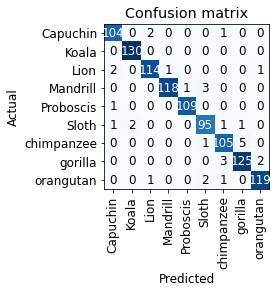

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
plt.savefig('confusion5.png')
interp.plot_confusion_matrix()

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('/content/gdrive/MyDrive/fastai/unpackai/datafast/Lion/007_fb63eb4c.jpg')

('Lion',
 tensor(2),
 tensor([7.2615e-11, 1.4070e-13, 1.0000e+00, 2.0867e-10, 3.5068e-14, 1.3680e-10, 2.3815e-10, 3.2441e-12, 9.4801e-12]))

In [ ]:
learn_inf.dls.vocab

['Capuchin', 'Koala', 'Lion', 'Mandrill', 'Proboscis', 'Sloth', 'chimpanzee', 'gorilla', 'orangutan']

In [ ]:
#hide_output
btn_upload = widgets.FileUpload(description='(upload your any monkey,sloth or skoala picture)',
                                layout=Layout(width='30%', height='50px'))

In [ ]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = [path/'/content/gdrive/MyDrive/fastai/unpackai/datafast/Lion/007_fb63eb4c.jpg'])
img = PILImage.create(btn_upload.data[-1])

In [ ]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(1028,1028))

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)
lbl_pred = widgets.Label(layout=Layout(width='50%', height='50px'))
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [ ]:
btn_run = widgets.Button(description='Classify',layout=Layout(width='30%', height='50px'))


In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(1028,1028))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

    
btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload(description='upload your monkey,gorilla,sloth or skoala picture',
                                layout=Layout(width='30%', height='50px'))

In [ ]:
#hide_output
VBox([widgets.Label('Hello to my app!'), 
      btn_upload, btn_run, out_pl, lbl_pred])